# HISTORY OF WINE
<br>
The earliest archaeological evidence of wine grapes has been found at sites in Georgia (c. 6000 BC), Iran (c. 5000 BC), Greece (c. 4500 BC), and Sicily (c. 4000 BC) although there is earlier evidence of a wine made from fermented grapes among other fruits being consumed in China (c. 7000–5500 BC). The oldest evidence of wine production has been found in Armenia (c. 4100 BC).

The altered consciousness produced by wine has been considered religious since its origin. The ancient Greeks worshiped Dionysus or Bacchus and the Ancient Romans carried on his cult. Consumption of ritual wine was part of Jewish practice since Biblical times and, as part of the eucharist commemorating Jesus's Last Supper, became even more essential to the Christian Church. Although Islam nominally forbade the production or consumption of wine, during its Golden Age, alchemists such as Geber pioneered wine's distillation for medicinal and industrial purposes such as the production of perfume.

Wine production and consumption increased, burgeoning from the 15th century onwards as part of European expansion. Despite the devastating 1887 phylloxera louse infestation, modern science and technology adapted and industrial wine production and wine consumption now occur throughout the world.
<font size=0.5>https://en.wikipedia.org/wiki/History_of_wine</font>
<br>
<img src="https://spectatorlife.imgix.net/content/uploads/2018/04/iStock-615269202.jpg?auto=compress,enhance,format&crop=faces,entropy,edges&fit=crop&w=820&h=550" width=500/>
<br>

Our dataset contains features below. We will analyze the dataset and use Natural Language Process to make a prediction.

<font size=4 color="red">**CONTENT**</font><br>
    1.[Import Libraries and Read Data](#1)<br>
    2.[Explore and Visualize Data](#2)<br>
    3.[Natural Language Process](#3)<br>

## <a id=1></a>Import Libraries and Read Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['winemag-data_first150k.csv', 'winemag-data-130k-v2.csv', 'winemag-data-130k-v2.json']


In [2]:
df = pd.read_csv("../input/winemag-data-130k-v2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [4]:
df.head() # First 5 rows of our dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Dataset contains; <br><br>

**country**: The country that the wine is from <br>
**description**: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc. <br>
**designation**: The vineyard within the winery where the grapes that made the wine are from <br>
**points**: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80) <br>
**price**: The cost for a bottle of the wine <br>
**province**: The province or state that the wine is from <br>
**region_1**: The wine growing area in a province or state (ie Napa) <br>
**region_2**: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank <br>
**taster_name**: Name of the person who tasted and reviewed the wine <br>
**taster_twitter_handle**: Twitter handle for the person who tasted and reviewed the wine <br>
**title**: The title of the wine review, which often contains the vintage if you're interested in extracting that feature <br>
**variety**: The type of grapes used to make the wine (ie Pinot Noir) <br>
**winery**: The winery that made the wine <br>

In [5]:
# Let's delete "Unnamed: 0" column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

## <a id=2></a> Exploration and Visualization of Data

**Number of Wine Tasted According To Countries** (Top 10)

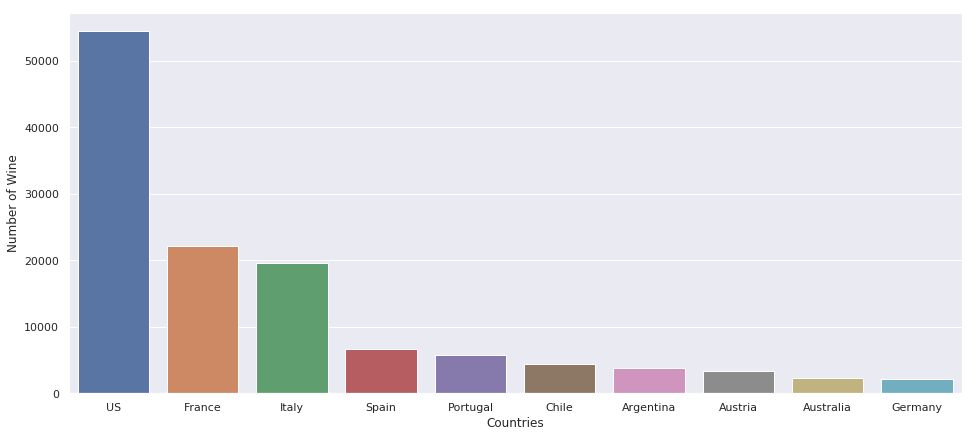

In [6]:
plt.figure(figsize=(16,7))
sns.set(style="darkgrid")
sns.barplot(x=df.country.value_counts()[:10].index, y=df.country.value_counts()[:10].values)
plt.xlabel("Countries")
plt.ylabel("Number of Wine")
plt.show()

**Average Points** (Top 10)

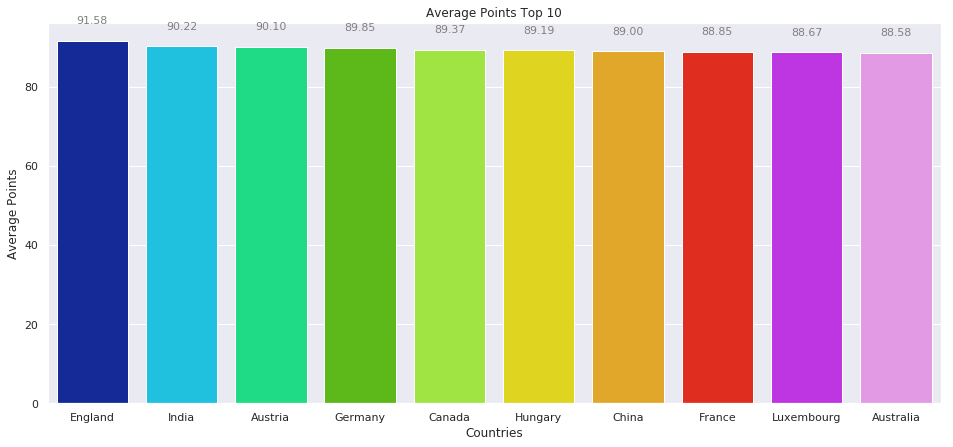

In [7]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="points",ascending=False).points.index[:10], y=df.groupby("country").mean().sort_values(by="points",ascending=False).points.values[:10], palette="gist_ncar")
plt.xlabel("Countries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

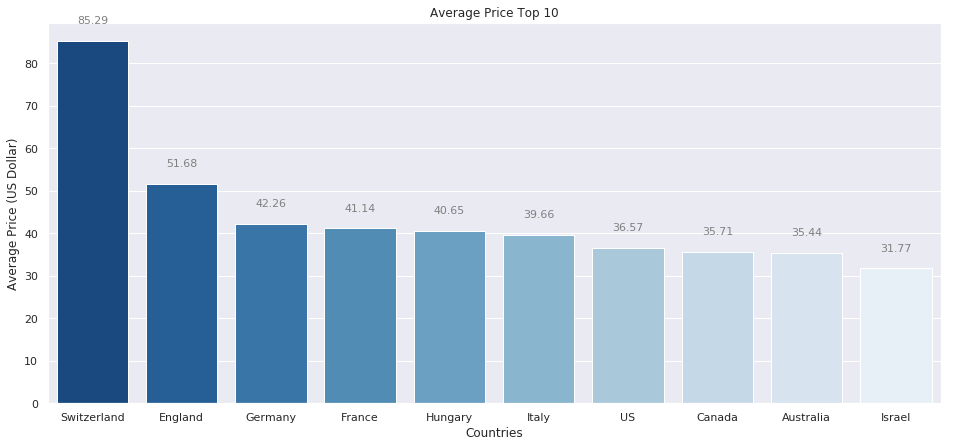

In [8]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="price",ascending=False).price.index[:10], y=df.groupby("country").mean().sort_values(by="price",ascending=False).price.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Price (US Dollar)")
plt.title("Average Price Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

**Points / Price Ratio** (Top 10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



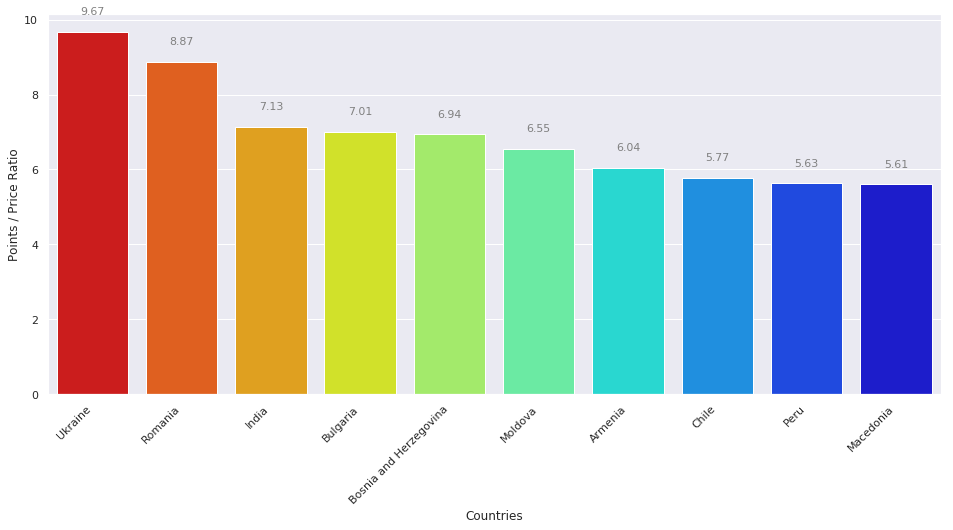

In [9]:
df2 = df[np.isfinite(df["price"])]
df2["points/price"] = df2.points / df2.price
df2.groupby("country").mean().sort_values(by="points/price", ascending=False)

plt.figure(figsize=(16,7))
g = sns.barplot(x=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].index[:10], y=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].values[:10], palette="jet_r")
plt.xlabel("Countries")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Points / Price Ratio")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

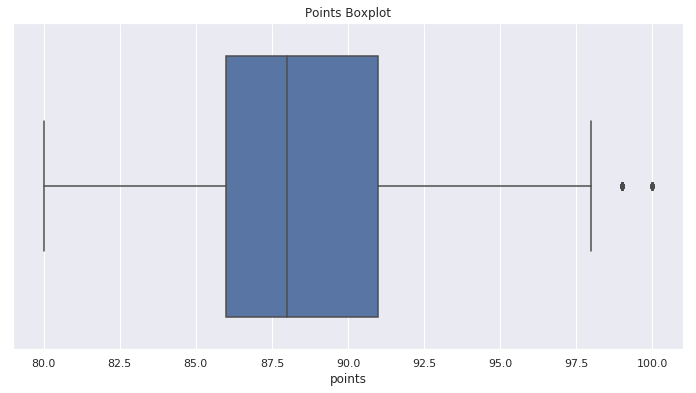

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.points)
plt.title("Points Boxplot")
plt.show()

 **Best Wines According to Points** (Top 20)

In [11]:
top20Points = df.sort_values(by="points", ascending=False).head(20)

for i in range(20):
    print("{} / {} / {} / $ {}".format(top20Points.title.values[i], top20Points.country.values[i], top20Points.province.values[i], top20Points.price.values[i]))
    print("-----------------------------------------------------------------------------------------------------------------------")

Quinta do Noval 2011 Nacional Vintage  (Port) / Portugal / Port / $ 650.0
-----------------------------------------------------------------------------------------------------------------------
Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne) / France / Champagne / $ 617.0
-----------------------------------------------------------------------------------------------------------------------
Charles Smith 2006 Royal City Syrah (Columbia Valley (WA)) / US / Washington / $ 80.0
-----------------------------------------------------------------------------------------------------------------------
Biondi Santi 2010 Riserva  (Brunello di Montalcino) / Italy / Tuscany / $ 550.0
-----------------------------------------------------------------------------------------------------------------------
Cayuse 2008 Bionic Frog Syrah (Walla Walla Valley (WA)) / US / Washington / $ 80.0
-----------------------------------------------------------------------------------------------------

<img src="https://i.ytimg.com/vi/pkVhgV705VA/hqdefault.jpg" width=400/>
<img src="https://thefinestbubble.com/the-finest-bubble-products-champagne-buy-online-same-day-london-delivery-free-delivery-%A3200%2B-next-day-uk-delivery-bottle-75cl-corporate-gifts-champagne-gift/thumbnails-new/salon-le-mesnil-blanc-de-blanc-2006-.jpg" width=350/>

In [12]:
labels = top20Points.country.value_counts().index
values = top20Points.country.value_counts().values

trace = go.Pie(labels=labels, values=values)

iplot([trace])

**The Type of Grapes Used to Make The Wine** (Top 10)
<br>
<img src="https://static.vinepair.com/wp-content/uploads/2017/09/9-pinot-noir-internal.jpg" width=400/>
<font size=0.5 color="red">Pinot Noir</font>

In [13]:
df.variety.value_counts()

fig = {
  "data": [
    {
      "values": df.variety.value_counts().values[:10],
      "labels": df.variety.value_counts().index[:10],
      "name": "Variaty",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    ],
  "layout": {
        "title":"Variaty",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Grapes",
                "x": 0.5,
                "y": 0.5
            },
        ]
    }
}

iplot(fig)


# <a id=3></a> Natural Language Process (NLP) 
Now we will try to predict if a wine's point is above average or not. We'll do that by using descriptions about wines and we'll use NLP algorithm.

In [14]:
meanPoints = df.points.mean()
df["Above_Average"] = [1 if i > meanPoints else 0 for i in df.points]

In [15]:
# This process can takes long time. Because we have a lot of descriptions.

import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp

descriptionList = list()
lemma = nlp.WordNetLemmatizer()

for description in df.description:
    description = re.sub("[^a-zA-Z]"," ",description) # We use regular expression to delete non-alphabetic characters on data.
    description = description.lower() # Since upper and lower characters are (e.g a - A) evaluated like they are different each other by computer we make turn whole characters into lowercase.
    description = nltk.word_tokenize(description) # We tokenized the statement
    description = [i for i in description if not i in set(stopwords.words("english"))] # We will remove words like 'the', 'or', 'and', 'is' etc.
    description = [lemma.lemmatize(i)for i in description] # e.g: loved => love
    description = " ".join(description) # Now we turn our words list into sentence again
    descriptionList.append(description)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
# We try to use most common 1500 words to make a prediction.

max_features = 1500
count_vectorizer = CountVectorizer(max_features=max_features) # stop_words="english" i istersek burada yazabilirdik, lowercase' de burada kullanabilirdik vs.
sparce_matrix = count_vectorizer.fit_transform(descriptionList)

In [78]:
sparce_matrix = sparce_matrix.toarray()

In [79]:
print("Most Frequent {} Words: {}".format(max_features, count_vectorizer.get_feature_names()))

Most Frequent 1500 Words: ['abound', 'abundant', 'acacia', 'accent', 'accented', 'accessible', 'accompanied', 'acid', 'acidic', 'acidity', 'acre', 'across', 'add', 'added', 'adding', 'addition', 'additional', 'affordable', 'aftertaste', 'age', 'aged', 'ager', 'ageworthy', 'aggressive', 'aging', 'air', 'airing', 'alcohol', 'alicante', 'allow', 'allowing', 'allspice', 'alluring', 'almond', 'almost', 'along', 'alongside', 'already', 'also', 'although', 'always', 'amarone', 'american', 'among', 'amount', 'ample', 'angular', 'animal', 'anise', 'another', 'anything', 'ap', 'apparent', 'appeal', 'appealing', 'appear', 'appearance', 'appellation', 'appetizing', 'apple', 'approach', 'approachable', 'apricot', 'area', 'aroma', 'aromatic', 'aromatically', 'aromatics', 'around', 'array', 'asian', 'aspect', 'asphalt', 'assertive', 'astringency', 'astringent', 'atop', 'attention', 'attractive', 'attractively', 'austere', 'avola', 'away', 'back', 'backbone', 'backdrop', 'backed', 'background', 'bacon

In [80]:
x = sparce_matrix
y = df.iloc[:,13].values

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [84]:
# Prediction
y_pred = nb.predict(x_test)

In [85]:
print("Accuracy: {:.2f}%".format(nb.score(y_pred.reshape(-1,1), y_test)*100))

Accuracy: 76.76%


<font color="blue" size= 5 >Our model works with <font color="red">**76.76%**</font> of accuracy.</font>
<br>
<br>
<br>
<font size=4>**Thanks for your time.<br>
If you like it please upvote and I will be glad to hear your feedbacks!**</font>